In [71]:
import stan
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib
import matplotlib.pyplot as plt
import arviz as az
#matplotlib.rcParams['figure.figsize']=5,5
matplotlib.rcParams['figure.dpi']=100
#plt.style.use('ggplot')

# this is a work around found at 
# https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop-in-spyd
import nest_asyncio
nest_asyncio.apply()

Gaia measures distance to stars through paralax.  It measures the distance to a given star $n$ times and then reports: the mean ($\mu_{rep}$) and  standard deviation ($\sigma_{rep}$) for the distance, and how many times it measured it ($n$).  However, sometimes because of the uncertainty in the measurements the reported mean distance is negative, $\mu_{rep} < 0$ !!  Of course that this is not physical.  However, could we make a model to infer a probability distribution for the true $\mu_{true}$ and $\sigma_{true}$ ?

In [74]:
my_model = """
data {
 int <lower=0> N; // number of datapoints
 real mu_rep, sigma_rep;  // the reported mu and sigma
}

parameters {
  vector [N] x; // the N measurements which we ignore
  real<lower=0> mu_true;  // the true mu and sigma
  real<lower=0> sigma_true;
}

transformed parameters{
  // We need this block to give the program a deterministic equation between the variables.
  real mu_temp=0, sigma_temp=0;

  // This is how the mu and sigma are supposed to be computed from the ignored x[n]
  mu_temp = sum(x[1:N]) / N;  
  sigma_temp = sum(abs(x - mu_rep)) / N;  // STAN supports vectorized expressions as this, where mu is an scalar
    
  mu_temp = mu_rep;
  sigma_temp = sigma_rep;
}

model {
    mu_true ~ normal(0,5);
    sigma_true ~ normal(0,2*sigma_rep);
    x ~ normal(mu_true, sigma_true);  // STAN supports vectorized expressions as this
    }
"""

In [75]:
my_data = {'N': 5, 'mu': -1, 'sigma': 8}

In [76]:
model = stan.build(my_model, data=my_data, random_seed=0);

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s


In file included from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/tbb/concurrent_unordered_map.h:26,
                 from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:10,
                 from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core.hpp:53,
                 from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/sequi/.cache/httpstan/4.13.0/models/wmnd6m7s/model_wmnd6m7s.cpp:2:
/home/sequi/.local/lib/python3.10/site-packages/httpstan/include/tbb/internal/_concurrent_unordered_impl.h: In instantiation of ‘void tbb::interface5::internal::concurrent_unordered_base<Traits>::internal_init() [

Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s


/home/sequi/.cache/httpstan/4.13.0/models/wmnd6m7s/model_wmnd6m7s.cpp: In instantiation of ‘stan::scalar_type_t<T2> model_wmnd6m7s_namespace::model_wmnd6m7s::log_prob_impl(VecR&, VecI&, std::ostream*) const [with bool propto__ = false; bool jacobian__ = false; VecR = Eigen::Matrix<double, -1, 1>; VecI = Eigen::Matrix<int, -1, 1>; stan::require_vector_like_t<VecR>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; stan::require_not_st_var<VecR>* <anonymous> = 0; stan::scalar_type_t<T2> = double; std::ostream = std::basic_ostream<char>]’:
/home/sequi/.cache/httpstan/4.13.0/models/wmnd6m7s/model_wmnd6m7s.cpp:497:47:   required from ‘T_ model_wmnd6m7s_namespace::model_wmnd6m7s::log_prob(Eigen::Matrix<T_a, -1, 1>&, std::ostream*) const [with bool propto__ = false; bool jacobian__ = false; T_ = double; std::ostream = std::basic_ostream<char>]’
/home/sequi/.local/lib/python3.10/site-packages/httpstan/include/stan/model/model_base_crtp.hpp:93:80:   require

Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s


Building: 7.2s, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


RuntimeError: Error calling get_param_names: `Exception: variable does not exist; processing stage=data initialization; variable name=mu_rep; base type=double (in '/tmp/httpstan_l_7xy0zv/model_wmnd6m7s.stan', line 4, column 1 to column 24)`

In [77]:
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=3000, delta=0.95)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!


In [78]:
df = fit.to_frame() 
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,x.1,x.2,x.3,x.4,x.5,mu_true,sigma_true,mu_temp,sigma_temp
draws,,,,,,,,,,,,,,,,
0,-8.783910,0.998388,0.091577,4.0,15.0,0.0,15.711138,3.309272,5.655627,6.741668,12.383832,2.608628,4.498969,7.483633,-1.0,8.0
1,-10.035655,0.987970,0.020281,4.0,15.0,0.0,12.161167,8.683064,11.498186,2.761227,-4.271389,2.552797,2.577111,4.266600,-1.0,8.0
2,-7.678920,0.892564,0.027054,2.0,7.0,0.0,11.860057,-1.031154,-4.565839,0.587550,-0.516811,0.168249,0.156595,2.308751,-1.0,8.0
3,-13.587107,1.000000,0.067804,4.0,15.0,0.0,18.157590,-3.420493,-2.925668,2.187654,-19.049890,9.057878,1.061547,12.096828,-1.0,8.0
4,-8.787966,0.928904,0.091577,3.0,7.0,0.0,12.680253,-1.941900,7.409460,4.566235,13.438760,5.135453,4.298235,4.543616,-1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-19.149933,0.993654,0.067804,5.0,31.0,0.0,21.329971,49.010716,-10.102107,-17.891364,-18.421927,-0.318023,10.710068,29.361104,-1.0,8.0
3996,-3.599417,0.034442,0.091577,3.0,15.0,0.0,4.774184,7.512866,4.693477,5.322176,3.976371,7.391746,6.383975,1.321855,-1.0,8.0
3997,-13.377261,0.999988,0.020281,6.0,95.0,0.0,21.353367,-2.471578,-14.884432,1.795578,10.970013,12.475501,0.934274,9.110772,-1.0,8.0


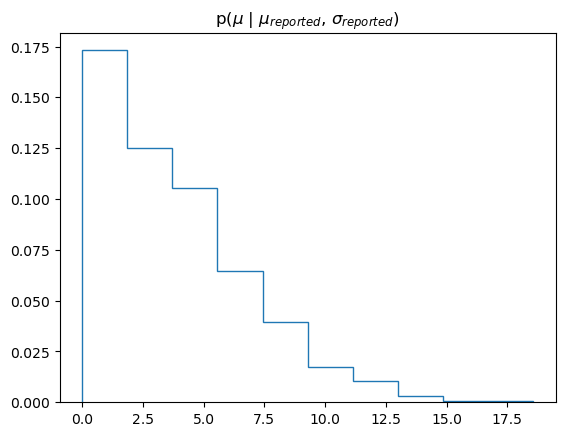

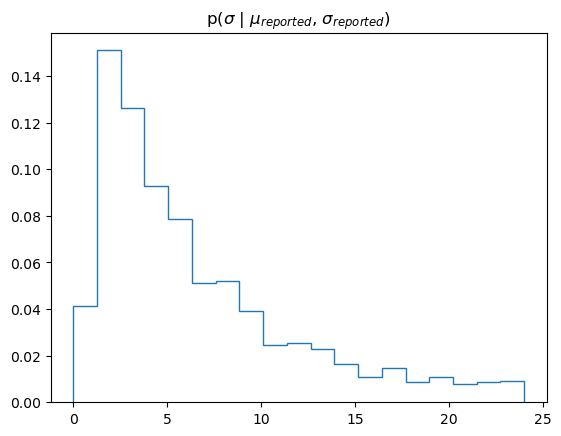

In [81]:
plt.hist(df['mu_true'], histtype='step', density=1)
plt.title('p($\mu$ | $\mu_{reported}$, $\sigma_{reported}$)')
plt.show()

plt.hist(df['sigma_true'], histtype='step', bins=np.linspace(0,3*my_data['sigma'],20), density=1)
plt.title('p($\sigma$ | $\mu_{reported}$, $\sigma_{reported}$)')
plt.show()

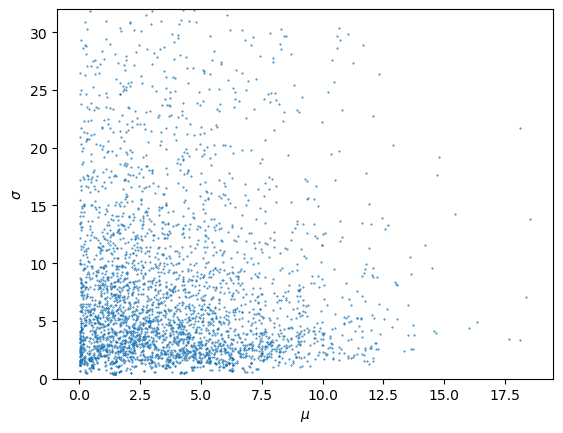

In [80]:
plt.scatter(df['mu_true'], df['sigma_true'], s=0.2)
plt.ylim(0,4*my_data['sigma'])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.show()